###You have seen how to perform a one-sided t-test in Python in 4.16 Lecture 6: Significance tests with Python 3 (the sleep apnoea example). Now test your skills by completing the following exercise:

### 1. Use the same code to generate some values for the number of sleeping problems for the two groups (diet and no diet). Feel free to change the range of possible values to (3,9) in the diet group and to (8,11) in the second group.

### 2. Perform a one-sided t-test and record the p-value.

### 3. Write your own Python implementation of a permutation test to generate 1,000 resamples; in each iteration perform a one-sided t-test and record the p-value.

### 4. Plot a histogram of these p-values and show where the original p-value lies (the p-value you obtained in step 2).

In [67]:
import random

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp


import matplotlib.pylab as plt

In [68]:
## generate some numbers for people who followed the diet
## Notice that your results can be different as we're generating random numbers
diet = []
for i in range(17):
    diet.append(random.randrange(3,9))
print(diet)



[4, 6, 6, 3, 7, 4, 7, 6, 7, 5, 5, 6, 7, 5]


In [130]:
## generate some numbers for people who did not follow the diet
## Notice that your results can be different as we're generating random numbers
nodiet = []
for i in range(13):
    nodiet.append(random.randrange(8,11))
print(nodiet)

[8, 10, 10, 9, 9, 9, 9, 9, 10, 10, 8, 9, 8]


In [134]:
## Run the t-test and extract the p-value
## We divide the resulting p-value by 2 beause this is a single-sided t-test
## Please read the documentation of the ttest_ind function
res = ttest_ind(diet, nodiet, equal_var=False)
obs_p_value = res.pvalue/2
print(f'p-value for single sided test: {res.pvalue / 2:.5f}')

p-value for single sided test: 0.00000


-3.5054945054945055


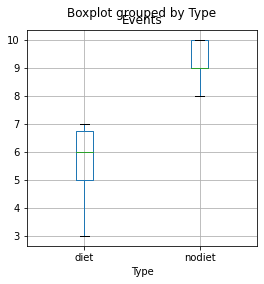

In [135]:
d = {'diet':diet, 'nodiet':nodiet}

data = []

for v in diet:
    data.append(['diet', v])

for v in nodiet:
    data.append(['nodiet', v])

df = pd.DataFrame(data, columns=['Type', 'Events'])

ax = df.boxplot(by='Type', column='Events', figsize=(4,4))

mean_diet = df[df.Type == 'diet'].Events.mean()
mean_no_diet = df[df.Type == 'nodiet'].Events.mean()

mean_diff = mean_diet - mean_no_diet
print(mean_diff)


### To apply a permutation test we need a function to randomly assign the total samples of 30 (17 diet + 13 no diet) to a group of 17 and a group of 13.

### function works by sampling (wo replacement) nB indices and assigning them to the B group. The remaniing nA indices are assigned to group a

### the difference between the two means is returned

### function is called R times

In [136]:
def perm_fun_ttest(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    res = ttest_ind(x.loc[idx_A], x.loc[idx_B], equal_var=False)
    return res.pvalue/2

print (perm_fun_ttest(df.Events, nA, nB))


0.3342766586306709


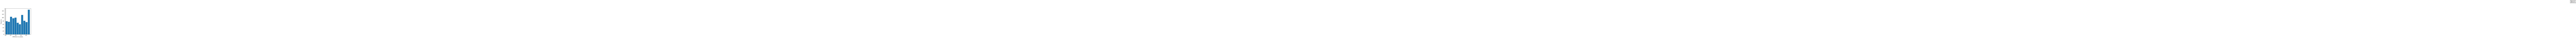

100.0 %


In [137]:
random.seed(1)

perm_ttests = [perm_fun_ttest(df.Events, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_ttests, bins=11, rwidth=0.9)
ax.axvline(x = obs_p_value, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Difference in p-values')
ax.set_ylabel('Frequency')

plt.show()

print(np.mean(perm_ttests > obs_p_value)*100, '%')

## Histogram shows that 100% of the time the random permutation p-values exceeded the observed p-value of 0.000.

In [113]:
def perm_fun(x, nA, nB): 
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

# gen n for each sample - counts number in each array, in this case 14

nA = df[df.Type == 'diet'].shape[0]
nB = df[df.Type == 'nodiet'].shape[0]


print(perm_fun(df.Events, nA, nB))



-0.05494505494505475


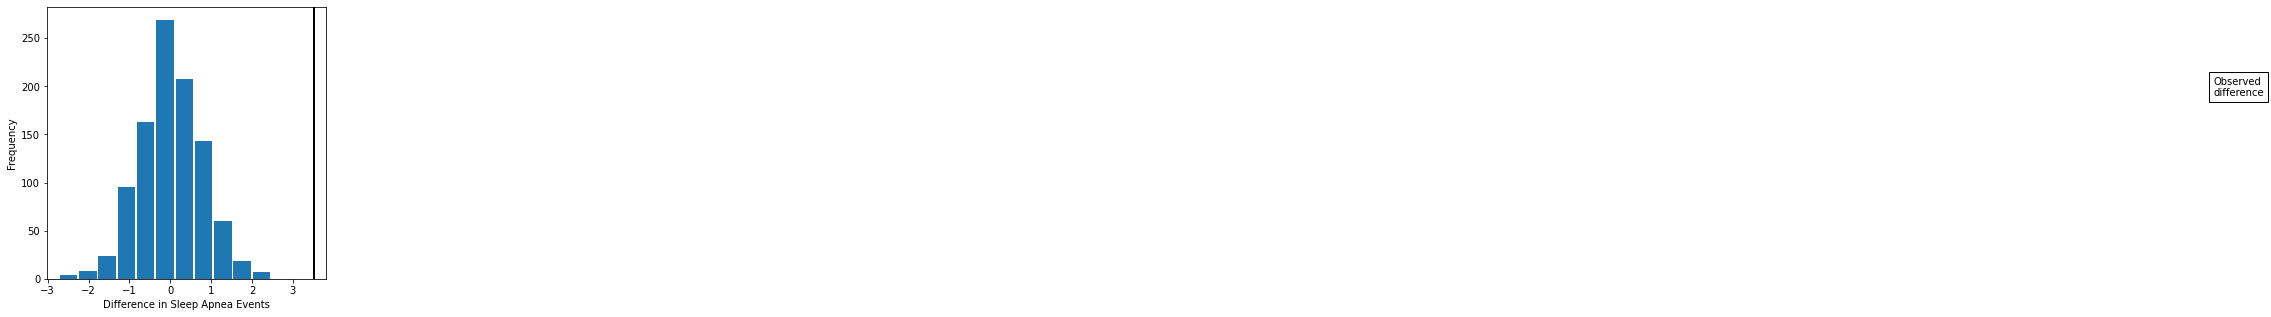

0.0 %


In [114]:
random.seed(1)
perm_diffs = [perm_fun(df.Events, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_no_diet - mean_diet, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Difference in Sleep Apnea Events')
ax.set_ylabel('Frequency')

plt.show()

print(np.mean(perm_diffs > mean_no_diet - mean_diet)*100, '%')